C:\Users\HP\AppData\Local\Temp\ipykernel_4032\3926708413.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/train.csv', parse_dates=['Date'])


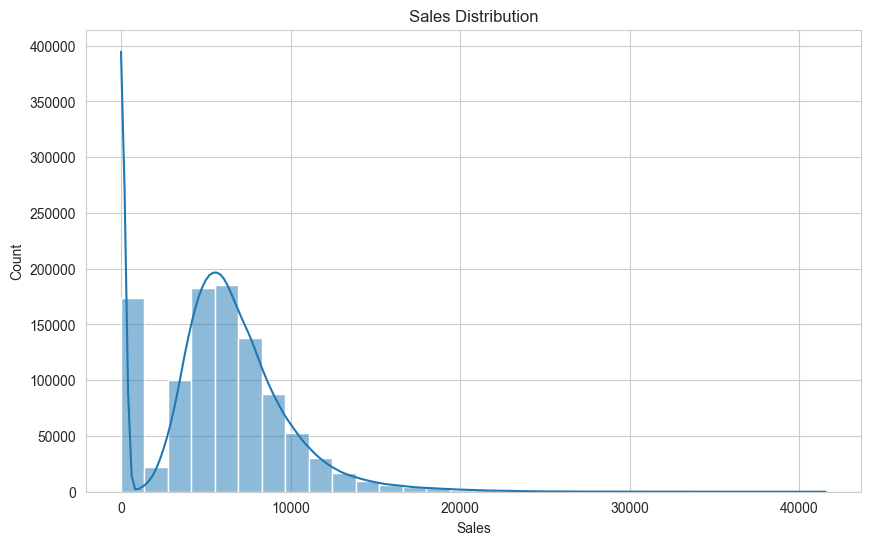

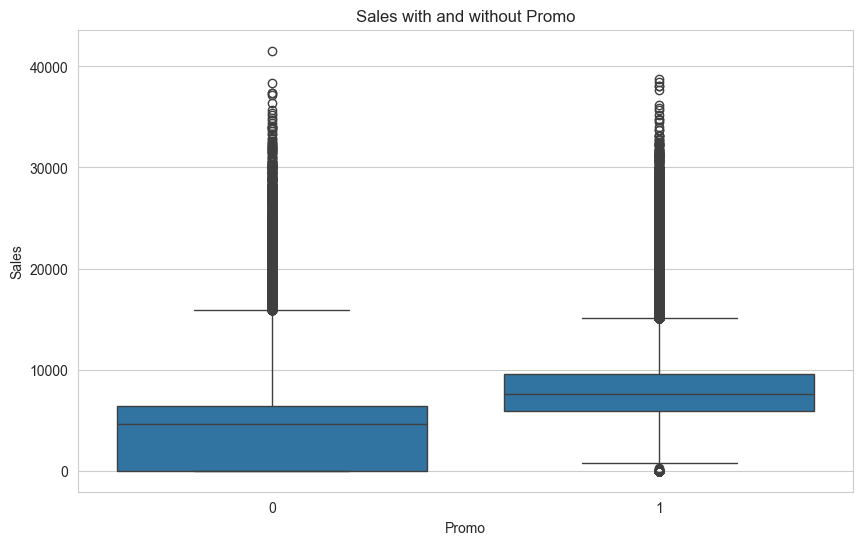

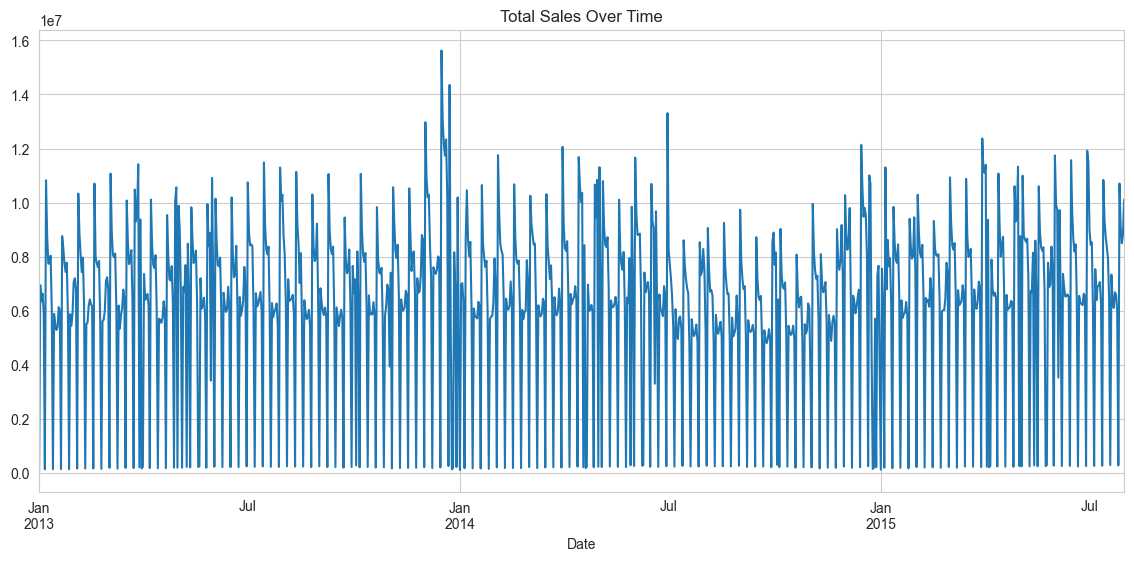

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
train = pd.read_csv('../data/train.csv', parse_dates=['Date'])
test = pd.read_csv('../data/test.csv', parse_dates=['Date'])
store = pd.read_csv('../data/store.csv')

# Merge datasets
train = train.merge(store, on='Store', how='left')
test = test.merge(store, on='Store', how='left')

# Data Cleaning: Handling missing values
train.fillna({'CompetitionDistance': train['CompetitionDistance'].median()}, inplace=True)
test.fillna({'CompetitionDistance': test['CompetitionDistance'].median()}, inplace=True)

# Visualizations
sns.set_style("whitegrid")

# Sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(train['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.show()

# Sales vs Promo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=train)
plt.title('Sales with and without Promo')
plt.show()

# Sales over time
plt.figure(figsize=(14, 6))
train.groupby('Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.show()

# More analysis can be added as per the task requirements
